## Observations and Insights 

In [1]:
# Dependencies and Setup
# %matplotlib notebook <- this is for Graphs to be interactive
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle
import pandas as pd
import scipy.stats as st
import os
import csv
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

In [2]:
mouse_metadata_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single dataset
combine_files_df = pd.merge(study_results_df, mouse_metadata_df, how='outer', on="Mouse ID")

# Display the data table for preview
combine_files_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [5]:
# Checking the number of mice.
mice_count_df = combine_files_df.dropna(how="any")
mice_count_df.count()

Mouse ID              1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
dtype: int64

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice_time_df = combine_files_df.groupby("Mouse ID")["Timepoint"].nunique()
dup_mice_time_df

Mouse ID
a203    10
a251    10
a262    10
a275    10
a366     7
        ..
z435     3
z578    10
z581    10
z795    10
z969    10
Name: Timepoint, Length: 249, dtype: int64

In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df = combine_files_df.drop_duplicates(subset="Mouse ID", keep="last")
clean_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
9,b128,45,38.982878,2,Capomulin,Female,9,22
10,f932,0,45.000000,0,Ketapril,Male,15,29
18,g107,35,71.905117,0,Ketapril,Female,2,29
21,a457,10,49.783419,0,Ketapril,Female,11,30
30,c819,40,62.175705,1,Ketapril,Male,21,25


In [8]:
# Optional: Get all the data for the duplicate mouse ID. 

In [9]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count_df = clean_data_df.dropna(how="any")
clean_mice_count_df.count()

Mouse ID              249
Timepoint             249
Tumor Volume (mm3)    249
Metastatic Sites      249
Drug Regimen          249
Sex                   249
Age_months            249
Weight (g)            249
dtype: int64

# Summary Statistics

In [10]:
#Generate a summary statistics table of mean, median, variance,standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.


In [11]:
#Rename the clean table to help with section of Homework working on.
sum_stats_df = clean_data_df.copy(deep=True)
sum_stats_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
9,b128,45,38.982878,2,Capomulin,Female,9,22
10,f932,0,45.000000,0,Ketapril,Male,15,29
18,g107,35,71.905117,0,Ketapril,Female,2,29
21,a457,10,49.783419,0,Ketapril,Female,11,30
30,c819,40,62.175705,1,Ketapril,Male,21,25


In [12]:
sum_stats_df.columns

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'],
      dtype='object')

In [13]:
#Mean of Tumor Volume
mean_tumor = sum_stats_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
mean_tumor

Drug Regimen
Capomulin    36.667568
Ceftamin     57.753977
Infubinol    58.178246
Ketapril     62.806191
Naftisol     61.205757
Placebo      60.508414
Propriva     56.736964
Ramicane     36.191390
Stelasyn     61.001707
Zoniferol    59.181258
Name: Tumor Volume (mm3), dtype: float64

In [14]:
#Median of Tumor Volume
median_tumor= sum_stats_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
median_tumor

Drug Regimen
Capomulin    38.125164
Ceftamin     59.851956
Infubinol    60.165180
Ketapril     64.487812
Naftisol     63.283288
Placebo      62.030594
Propriva     55.841410
Ramicane     36.561652
Stelasyn     62.192350
Zoniferol    61.840058
Name: Tumor Volume (mm3), dtype: float64

In [15]:
#Variance of the tumor volume 
var_tumor = sum_stats_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
var_tumor

Drug Regimen
Capomulin     32.663378
Ceftamin      69.982735
Infubinol     74.010875
Ketapril      98.921330
Naftisol     106.029927
Placebo       78.759797
Propriva      69.349002
Ramicane      32.166354
Stelasyn      90.331586
Zoniferol     76.862027
Name: Tumor Volume (mm3), dtype: float64

In [16]:
#Sstandard deviation of Tumor Volume
std_tumor = sum_stats_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
std_tumor

Drug Regimen
Capomulin     5.715188
Ceftamin      8.365568
Infubinol     8.602957
Ketapril      9.945920
Naftisol     10.297083
Placebo       8.874672
Propriva      8.327605
Ramicane      5.671539
Stelasyn      9.504293
Zoniferol     8.767099
Name: Tumor Volume (mm3), dtype: float64

In [17]:
#SEM of Tumor Volume
sem_tumor = sum_stats_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]
sem_tumor

Drug Regimen
Capomulin    1.143038
Ceftamin     1.673114
Infubinol    1.720591
Ketapril     1.989184
Naftisol     2.059417
Placebo      1.774934
Propriva     1.665521
Ramicane     1.134308
Stelasyn     1.940056
Zoniferol    1.753420
Name: Tumor Volume (mm3), dtype: float64

In [18]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
summary_stats_df = pd.DataFrame({'Mean of Tumor Volume':round(mean_tumor,2),
                          'Median of Tumor Volume':round(median_tumor,2),
                          'Variance of Tumor Volume':round(var_tumor,2),
                          'STD of Tumor Volume':round(std_tumor,2),
                          'SEM of Tumor Volume': round(sem_tumor,2)})
summary_stats_df

,Mean of Tumor Volume,Median of Tumor Volume,Variance of Tumor Volume,STD of Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,,
Capomulin,36.67,38.13,32.66,5.72,1.14
Ceftamin,57.75,59.85,69.98,8.37,1.67
Infubinol,58.18,60.17,74.01,8.60,1.72
Ketapril,62.81,64.49,98.92,9.95,1.99
Naftisol,61.21,63.28,106.03,10.30,2.06
Placebo,60.51,62.03,78.76,8.87,1.77
Propriva,56.74,55.84,69.35,8.33,1.67
Ramicane,36.19,36.56,32.17,5.67,1.13
Stelasyn,61.00,62.19,90.33,9.50,1.94


## Bar and Pie Charts

In [19]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

#Generating Table for refrence in this section of the Homework
bar_pie_chart_df = clean_data_df.copy(deep=True)
bar_pie_chart_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
9,b128,45,38.982878,2,Capomulin,Female,9,22
10,f932,0,45.000000,0,Ketapril,Male,15,29
18,g107,35,71.905117,0,Ketapril,Female,2,29
21,a457,10,49.783419,0,Ketapril,Female,11,30
30,c819,40,62.175705,1,Ketapril,Male,21,25


In [20]:
#Generating a Data Frame total of Drug Reigmen
timepoints_mice_df= pd.DataFrame(pd.value_counts(bar_pie_chart_df["Drug Regimen"]))
timepoints_mice_df.head()

,Drug Regimen
Naftisol,25
Zoniferol,25
Placebo,25
Ketapril,25
Infubinol,25


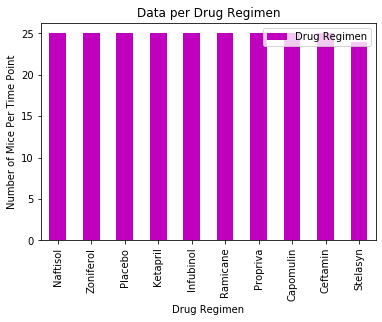

<Figure size 432x288 with 0 Axes>

In [21]:
#Generating Bar Chart
timepoints_mice_df.plot(kind= "bar", title="Data per Drug Regimen",color = 'm')
plt.ylabel("Number of Mice Per Time Point")
plt.xlabel("Drug Regimen")
plt.show()
plt.tight_layout()

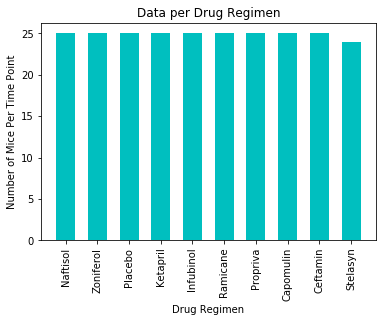

In [22]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = bar_pie_chart_df["Drug Regimen"].value_counts().index
y_axis = bar_pie_chart_df["Drug Regimen"].value_counts()

plt.bar(x_axis,y_axis, width = .6, color='c',align='center')

plt.xticks(rotation = 90)

plt.ylabel("Number of Mice Per Time Point")
plt.xlabel("Drug Regimen")
plt.title("Data per Drug Regimen")

plt.show()

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_mice= pd.value_counts(bar_pie_chart_df['Sex'])
gender_mice.head()

Male      125
Female    124
Name: Sex, dtype: int64

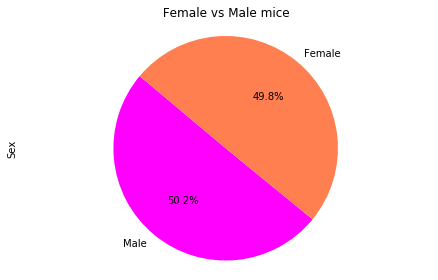

In [24]:
gender_pie = gender_mice.plot(kind="pie", y="Sex", autopct='%1.1f%%',title=" Female vs Male mice ", startangle=140, colors =["Magenta","coral"])
plt.tight_layout()
plt.axis("equal")
plt.show()

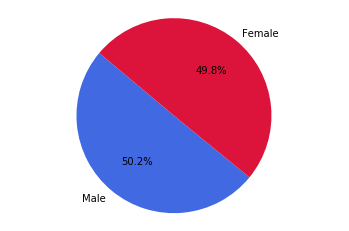

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(x=[125,124],labels=["Male","Female"],colors=["Royalblue","Crimson"],autopct='%1.1f%%',startangle=140)
plt.title=" Female vs Male mice "
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [26]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#Copying the merge data and renameing to complete this section of the Homework
final_tumor_df = clean_data_df.copy(deep=True)
final_tumor_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
9,b128,45,38.982878,2,Capomulin,Female,9,22
10,f932,0,45.000000,0,Ketapril,Male,15,29
18,g107,35,71.905117,0,Ketapril,Female,2,29
21,a457,10,49.783419,0,Ketapril,Female,11,30
30,c819,40,62.175705,1,Ketapril,Male,21,25


In [27]:
#Volume for the Drug Regiment Capomulin
capomulin_df = final_tumor_df.loc[final_tumor_df["Drug Regimen"] == "Capomulin",:]
capomulin_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
9,b128,45,38.982878,2,Capomulin,Female,9,22
1680,j246,35,38.753265,1,Capomulin,Female,21,21
1690,r554,45,32.377357,3,Capomulin,Female,8,17
1700,s185,45,23.343598,1,Capomulin,Female,3,17
1710,b742,45,38.939633,0,Capomulin,Male,7,21


In [28]:
# Start by getting the last (greatest) timepoint for each mouse
capomulin_last_df = capomulin_df.groupby('Mouse ID').max()['Timepoint']
capomulin_last_df.head(10)

Mouse ID
b128    45
b742    45
f966    20
g288    45
g316    45
i557    45
i738    45
j119    45
j246    35
l509    45
Name: Timepoint, dtype: int64

In [29]:
#Creating a Data Frame to put the data
capomulin_vol = pd.DataFrame(capomulin_last_df)
capomulin_vol.head()

,Timepoint
Mouse ID,
b128,45
b742,45
f966,20
g288,45
g316,45


In [30]:
#Merge Volume with the orginal Data Frame to create a new data Frame to work with
capomulin_merge_df = pd.merge(capomulin_vol,final_tumor_df, on=("Mouse ID","Timepoint"),how="left")
capomulin_merge_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22


In [31]:
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
     # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds   

In [32]:
capomulin_tumors_df = capomulin_merge_df["Tumor Volume (mm3)"]
capomulin_tumors_df

0     38.982878
1     38.939633
2     30.485985
3     37.074024
4     40.159220
5     47.685963
6     37.311846
7     38.125164
8     38.753265
9     41.483008
10    38.846876
11    28.430964
12    33.329098
13    46.539206
14    32.377357
15    41.581521
16    23.343598
17    40.728578
18    34.455298
19    31.023923
20    40.658124
21    39.952347
22    36.041047
23    28.484033
24    31.896238
Name: Tumor Volume (mm3), dtype: float64

In [33]:
#Volume for the Drug Regiment Ramicane
ramicane_df = final_tumor_df.loc[final_tumor_df["Drug Regimen"] == "Ramicane", :]
ramicane_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
442,c458,30,38.342008,2,Ramicane,Female,23,20
450,q610,35,36.561652,2,Ramicane,Female,18,21
460,j913,45,31.560470,1,Ramicane,Female,4,17
470,a411,45,38.407618,1,Ramicane,Male,3,22
480,a444,45,43.047543,0,Ramicane,Female,10,25


In [34]:
# Start by getting the last (greatest) timepoint for each mouse
ramicane_last_df = ramicane_df.groupby('Mouse ID').max()['Timepoint']
ramicane_last_df.head(10)

Mouse ID
a411    45
a444    45
a520    45
a644    45
c458    30
c758    45
d251    45
e662    45
g791    45
i177    45
Name: Timepoint, dtype: int64

In [35]:
#Creating a Data Frame to put the data
ramicane_vol = pd.DataFrame(ramicane_last_df)
ramicane_vol.head()

,Timepoint
Mouse ID,
a411,45
a444,45
a520,45
a644,45
c458,30


In [36]:
#Merge Volume with the orginal Data Frame to create a new data Frame to work with
ramicane_merge_df = pd.merge(ramicane_vol,final_tumor_df, on=("Mouse ID","Timepoint"),how="left")
ramicane_merge_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a411,45,38.407618,1,Ramicane,Male,3,22
1,a444,45,43.047543,0,Ramicane,Female,10,25
2,a520,45,38.810366,1,Ramicane,Male,13,21
3,a644,45,32.978522,1,Ramicane,Female,7,17
4,c458,30,38.342008,2,Ramicane,Female,23,20


In [37]:
#Volume for the Drug Regiment Infubinol
infubinol_df = final_tumor_df.loc[final_tumor_df["Drug Regimen"] == "Infubinol", :]
infubinol_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
214,c326,5,36.321346,0,Infubinol,Female,18,25
224,c139,45,72.226731,2,Infubinol,Male,11,28
226,v339,5,46.250112,0,Infubinol,Male,20,26
233,a577,30,57.031862,2,Infubinol,Female,6,25
243,y163,45,67.685569,3,Infubinol,Female,17,27


In [38]:
# Start by getting the last (greatest) timepoint for each mouse
infubinol_last_df = infubinol_df.groupby('Mouse ID').max()['Timepoint']
infubinol_last_df.head(10)

Mouse ID
a203    45
a251    45
a577    30
a685    45
c139    45
c326     5
c895    30
e476    45
f345    45
i386    40
Name: Timepoint, dtype: int64

In [39]:
#Creating a Data Frame to put the data
infubinol_vol = pd.DataFrame(infubinol_last_df)
infubinol_vol.head()

,Timepoint
Mouse ID,
a203,45
a251,45
a577,30
a685,45
c139,45


In [40]:
#Merge Volume with the orginal Data Frame to create a new data Frame to work with
infubinol_merge_df = pd.merge(infubinol_vol,final_tumor_df, on=("Mouse ID","Timepoint"),how="left")
infubinol_merge_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a577,30,57.031862,2,Infubinol,Female,6,25
3,a685,45,66.083066,3,Infubinol,Male,8,30
4,c139,45,72.226731,2,Infubinol,Male,11,28


In [41]:
#Volume for the Drug Regiment Ceftamin
ceftamin_df = final_tumor_df.loc[final_tumor_df["Drug Regimen"] == "Ceftamin", :]
ceftamin_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1313,x822,45,61.386660,3,Ceftamin,Male,3,29
1316,l558,10,46.784535,0,Ceftamin,Female,13,30
1326,l733,45,64.299830,1,Ceftamin,Female,4,30
1330,f436,15,48.722078,2,Ceftamin,Female,3,25
1337,l490,30,57.918381,3,Ceftamin,Male,24,26


In [42]:
# Start by getting the last (greatest) timepoint for each mouse
ceftamin_last_df = ceftamin_df.groupby('Mouse ID').max()['Timepoint']
ceftamin_last_df.head(10)

Mouse ID
a275    45
b447     0
b487    25
b759    30
f436    15
h531     5
j296    45
k210    45
l471    45
l490    30
Name: Timepoint, dtype: int64

In [43]:
#Creating a Data Frame to put the data
ceftamin_vol = pd.DataFrame(ceftamin_last_df)
ceftamin_vol.head()

,Timepoint
Mouse ID,
a275,45
b447,0
b487,25
b759,30
f436,15


In [44]:
#Merge Volume with the orginal Data Frame to create a new data Frame to work with
ceftamin_merge_df = pd.merge(ceftamin_vol,final_tumor_df, on=("Mouse ID","Timepoint"),how="left")
ceftamin_merge_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a275,45,62.999356,3,Ceftamin,Female,20,28
1,b447,0,45.000000,0,Ceftamin,Male,2,30
2,b487,25,56.057749,1,Ceftamin,Female,6,28
3,b759,30,55.742829,1,Ceftamin,Female,12,25
4,f436,15,48.722078,2,Ceftamin,Female,3,25


In [45]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data_to_plot = [capomulin_tumors]
Regimen= ['Capomulin']

fig1, ax1 = plt.subplots(figsize=(15, 10))
ax1.set_title('Tumor Volume at Selected Mouse',fontsize =25)
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 14)
ax1.set_xlabel('Drug Regimen',fontsize = 14)
ax1.boxplot(data_to_plot, labels=Regimen, widths = 0.4, patch_artist=True,vert=True)

#plt.ylim(10, 80)
plt.show()

NameError: name 'capomulin_tumors' is not defined

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
